<a href="https://colab.research.google.com/github/isDaisyorDaisy/proejcts/blob/main/Mobile_Games_A_B_Testing_%26_Player_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('cookie_cats.csv')

df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [ ]:
df[df['sum_gamerounds']==49854]

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


In [ ]:
#df[['userid','version','retention_1', 'retention_7']].groupby('version').count()

df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [ ]:
#df.sum_gamerounds.describe()
df[df['sum_gamerounds'] == 49854]
df.sum
#df['sum_gamerounds'].value_counts().sort_values(ascending = True) #????

<bound method NDFrame._add_numeric_operations.<locals>.sum of         userid  version  sum_gamerounds  retention_1  retention_7
0          116  gate_30               3        False        False
1          337  gate_30              38         True        False
2          377  gate_40             165         True        False
3          483  gate_40               1        False        False
4          488  gate_40             179         True         True
...        ...      ...             ...          ...          ...
90184  9999441  gate_40              97         True        False
90185  9999479  gate_40              30        False        False
90186  9999710  gate_30              28         True        False
90187  9999768  gate_40              51         True        False
90188  9999861  gate_40              16        False        False

[90189 rows x 5 columns]>

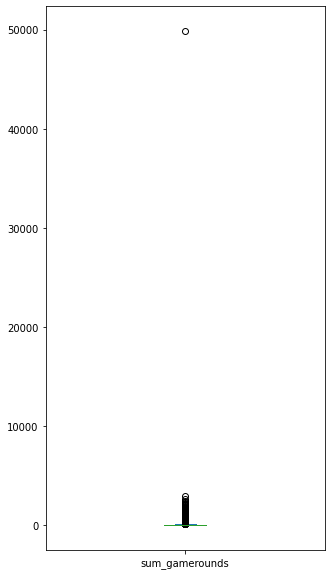

In [ ]:
df['sum_gamerounds'].plot.box(figsize=(5,10))#####???????

In [ ]:
df[df['sum_gamerounds'] == 49854]

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


In [ ]:
df.drop(57702, axis = 0, inplace = True)


In [ ]:
df.sum_gamerounds.describe()

count    90188.000000
mean        51.320253
std        102.682719
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

EDA

In [ ]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [ ]:
df11 = df.groupby(['version', 'sum_gamerounds'])['sum_gamerounds','retention_1', 'retention_7'].count()
#sum_rounds???
#counts count() is used to count the number of non-NA/null observations across the given axis. It works with non-floating type data as well. 数字字符都可以
###value_counts()value_counts() function returns Series containing counts of unique values.  针对数字
#df11 = df[['sum_gamerounds','retention_1', 'retention_7']].groupby(['version', 'sum_gamerounds']).count()
# . version in df[]????
#df11['level'] = df11['sum_gamerounds'].index()
# min max 
df11
# df.user_id.value_counts().sort_values(ascending = False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


sum_gamerounds  retention_1  retention_7
version sum_gamerounds                                          
gate_30 0                         1937         1937         1937
        1                         2749         2749         2749
        2                         2198         2198         2198
        3                         1899         1899         1899
        4                         1831         1831         1831
...                                ...          ...          ...
gate_40 2015                         1            1            1
        2063                         1            1            1
        2124                         1            1            1
        2294                         1            1            1
        2640                         1            1            1

[1570 rows x 3 columns]

In [ ]:
df_1 = df[['version', 'retention_1', 'retention_7', 'sum_gamerounds']]

# make a new df from the old one
df_1.head()

,version,retention_1,retention_7,sum_gamerounds
0,gate_30,False,False,3
1,gate_30,True,False,38
2,gate_40,True,False,165
3,gate_40,False,False,1
4,gate_40,True,True,179


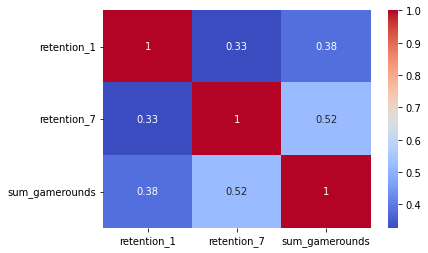

In [ ]:
sns.heatmap(df_1[[ 'retention_1', 'retention_7', 'sum_gamerounds']].corr(), annot = True, cmap = 'coolwarm')

In [ ]:
plot_df = df.groupby('sum_gamerounds')['userid'].count()
plot_df

sum_gamerounds
0       3994
1       5538
2       4606
3       3958
4       3629
        ... 
2251       1
2294       1
2438       1
2640       1
2961       1
Name: userid, Length: 941, dtype: int64

In [ ]:
df.sum_gamerounds.describe()

count    90188.000000
mean        51.320253
std        102.682719
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

Text(0.5, 0, '# Game rounds')

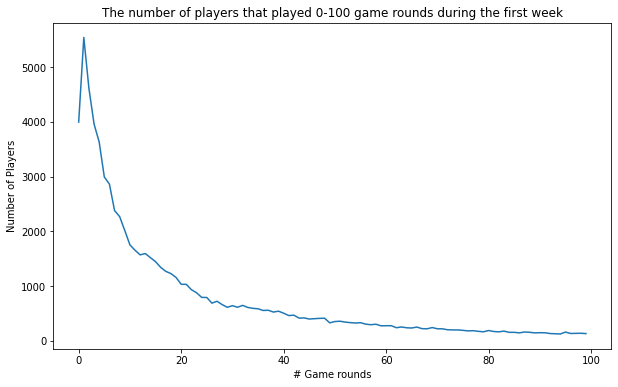

In [ ]:
%matplotlib inline
ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")###during first week?
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')


Z-test
for day1 retention of gate30 and gate40

In [ ]:

df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


for day 1 of gate30 and gate40

hypothesis gate_40_retention_1 > gate_30_retention_1


In [ ]:
count_30_retention_1 = df[df['version'] == 'gate_30'].retention_1.sum()
count_30_retention_1

20034

In [ ]:
total_30_retention_1 = len(df[df['version'] == 'gate_30'].retention_1)
total_30_retention_1

44699

In [ ]:
count_40_retention_1 = df[df.version == 'gate_40'].retention_1.sum()
count_40_retention_1

20119

In [ ]:
total_40_retention_1 = len(df[df['version'] == 'gate_40'].retention_1)
total_40_retention_1

45489

In [ ]:
data_dic = {'convert':{'gate_30':count_30_retention_1, 'gate_40':count_40_retention_1}, 'total':{'gate_30': total_30_retention_1,
                                                                                                   'gate_40':total_40_retention_1}}

In [ ]:
data_new = pd.DataFrame(data_dic)
data_new

,convert,total
gate_30,20034,44699
gate_40,20119,45489


In [ ]:
data_new['convert_rate'] = data_new['convert']/ data_new['total']
data_new['convert_rate'] = data_new['convert_rate'].apply(lambda x: str(np.round(x,3)*100)+'%')
data_new

,convert,total,convert_rate
gate_30,20034,44699,44.800000000000004%
gate_40,20119,45489,44.2%


In [ ]:
def z_test(p1,p0, n1, n0):###
  delta = p1-p0
  p = (p1*n1 + p0*n0)/(n1+n0)
  return delta/ np.sqrt(p*(1-p)*(1/n1 + 1/n0))

In [ ]:
p1 = count_40_retention_1/total_40_retention_1
p0 = count_30_retention_1/total_30_retention_1
n1 = total_40_retention_1
n0 = total_30_retention_1
p1, p0, n1, n0

(0.44228274967574577, 0.4481979462627799, 45489, 44699)

In [ ]:
z_value = z_test(p1, p0, n1, n0)
z_value

-1.787103509763628

In [ ]:
from scipy.stats import norm

In [ ]:
p_value = 1-norm.cdf(z_value)
p_value

0.9630396198290827

In [ ]:
import statsmodels.api as sm

In [ ]:
z_score_1, p_value_1 = sm.stats.proportions_ztest([count_40_retention_1, count_30_retention_1], [total_40_retention_1, total_30_retention_1], alternative = 'larger')

In [ ]:
z_score_1, p_value_1

(-1.787103509763628, 0.9630396198290827)

for day 7 of gate30 and gate40

hypothesis gate_40_retention_7 > gate_30_retention_7

In [ ]:
count_30_retention_7 = df[df['version'] == 'gate_30'].retention_7.sum()
count_30_retention_7

8501

In [ ]:
total_30_retention_7 = df[df['version'] == 'gate_30'].retention_7.count()
total_30_retention_7


44699

In [ ]:
count_40_retention_7 = df[df.version == 'gate_40'].retention_7.sum()
count_40_retention_7

8279

In [ ]:
total_40_retention_7= len(df[df['version'] == 'gate_40'].retention_7)
total_40_retention_7

45489

In [ ]:
def z_test(p1,p0, n1, n0):###
  delta = p1-p0
  p = (p1*n1 + p0*n0)/(n1+n0)
  return delta/ np.sqrt(p*(1-p)*(1/n1 + 1/n0))

In [ ]:
p1 = count_40_retention_7/total_40_retention_7
p0 = count_30_retention_7/total_30_retention_7
n1 = total_40_retention_7
n0 = total_30_retention_7
p1, p0, n1, n0

(0.18200004396667327, 0.19018322557551623, 45489, 44699)

In [ ]:
z_value = z_test(p1, p0, n1, n0)
z_value

-3.1574100858819936

In [ ]:
from scipy.stats import norm

In [ ]:
p_value = 1-norm.cdf(z_value)
p_value

0.9992041134113003

In [ ]:
z_score_7, p_value_7 =  sm.stats.proportions_ztest([count_40_retention_7, count_30_retention_7], [total_40_retention_7, total_30_retention_7], alternative = 'larger')

In [ ]:
z_score_7, p_value_7

(-3.1574100858819936, 0.9992041134113003)

In [ ]:
z_score_1, p_value_1, z_score_7, p_value_7

(-1.787103509763628,
 0.9630396198290827,
 -3.1574100858819936,
 0.9992041134113003)

In [ ]:
data_dic_7 = {'convert':{'gate_30':count_30_retention_7, 'gate_40':count_40_retention_7}, 'total':{'gate_30': total_30_retention_7,
                                                                                                   'gate_40':total_40_retention_7}}

In [ ]:
data_new_7 = pd.DataFrame(data_dic)
data_new_7

,convert,total
gate_30,20034,44699
gate_40,20119,45489


In [ ]:
data_new_7['convert_rate'] = data_new_7['convert']/ data_new_7['total']
data_new_7['convert_rate'] = data_new_7['convert_rate'].apply(lambda x: str(np.round(x,3)*100)+'%')
data_new_7

,convert,total,convert_rate
gate_30,20034,44699,44.800000000000004%
gate_40,20119,45489,44.2%


part_4


In [ ]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [ ]:
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448198
gate_40    0.442283
Name: retention_1, dtype: float64

In [ ]:
boot_1 = []
for i in range(1000):
  boot_mean = df.sample(frac = 1, replace = True).groupby('version')['retention_1'].mean()
  boot_1.append(boot_mean)

In [ ]:
boot_df_1 = pd.DataFrame(boot_1)
boot_df_1

version,gate_30,gate_40
retention_1,0.447596,0.442151
retention_1,0.451623,0.446329
retention_1,0.445840,0.439142
retention_1,0.450528,0.443277
retention_1,0.449273,0.443758
...,...,...
retention_1,0.443867,0.440237
retention_1,0.446576,0.441269
retention_1,0.447651,0.441989
retention_1,0.450426,0.440620


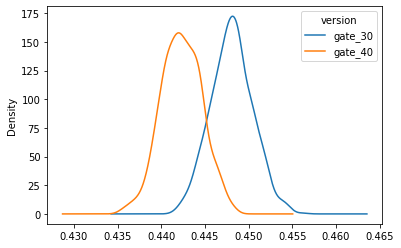

In [ ]:
boot_df_1.plot(kind = 'density')

In [ ]:
boot_df_1['diff'] = (boot_df_1.gate_30 - boot_df_1.gate_40)/boot_df_1.gate_40*100
boot_df_1

version,gate_30,gate_40,diff
retention_1,0.447596,0.442151,1.231342
retention_1,0.451623,0.446329,1.186141
retention_1,0.445840,0.439142,1.525318
retention_1,0.450528,0.443277,1.635799
retention_1,0.449273,0.443758,1.242755
...,...,...,...
retention_1,0.443867,0.440237,0.824558
retention_1,0.446576,0.441269,1.202533
retention_1,0.447651,0.441989,1.281039
retention_1,0.450426,0.440620,2.225467


Probability that 1-day retention is greater when the gate is at level 30: 0.959


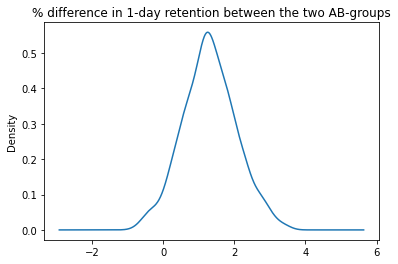

In [ ]:
ax = boot_df_1['diff'].plot(kind = 'density')
ax.set_title('% difference in 1-day retention between the two AB-groups')
print('Probability that 1-day retention is greater when the gate is at level 30:',(boot_df_1['diff'] > 0).mean())

7 days


In [ ]:
boot_7 = []
for i in range(1000):
  boot_mean = df.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()
  boot_7.append(boot_mean)


In [ ]:
boot_df_7 = pd.DataFrame(boot_7)
boot_df_7.head()

version,gate_30,gate_40
retention_7,0.189551,0.180123
retention_7,0.192642,0.179719
retention_7,0.188578,0.183537
retention_7,0.188704,0.181226
retention_7,0.186609,0.182179


In [ ]:
boot_df_7['diff'] = (boot_df_7['gate_30'] - boot_df_7['gate_40'])/boot_df_7['gate_40']*100
boot_df_7.head()

version,gate_30,gate_40,diff
retention_7,0.189551,0.180123,5.234193
retention_7,0.192642,0.179719,7.190834
retention_7,0.188578,0.183537,2.746728
retention_7,0.188704,0.181226,4.126368
retention_7,0.186609,0.182179,2.431822


Probability that 1-day retention is greater when the gate is at level 30: 0.998


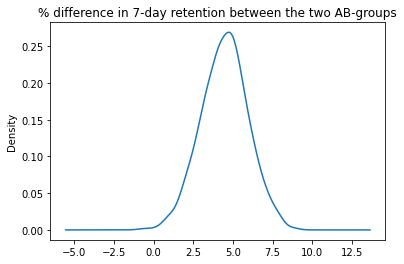

In [ ]:
ax = boot_df_7['diff'].plot(kind = 'density')
ax.set_title('% difference in 7-day retention between the two AB-groups')
print('Probability that 1-day retention is greater when the gate is at level 30:',(boot_df_7['diff'] > 0).mean())